In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
from plotly.graph_objs import Scatter, Figure, Layout, Histogram
init_notebook_mode(connected=True)
np.random.seed(68)
%matplotlib inline

In [2]:
df = pd.read_csv("performances.csv")

In [3]:
df.head()

,optim,n_functions,time
0,True,1,0.046567
1,False,1,0.056738
2,True,2,0.072186
3,False,2,0.085179
4,True,3,0.376812


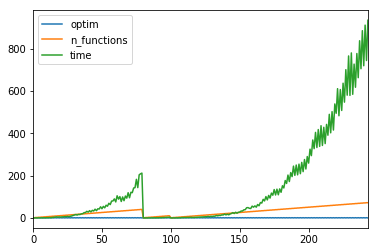

In [4]:
df.plot()

In [19]:
df_true = df[df["optim"] == True].groupby(by="n_functions").agg(np.mean)
df_false = df[df["optim"] == False].groupby(by="n_functions").agg(np.mean)

In [22]:
df_true.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72],
           dtype='int64', name=u'n_functions')

In [23]:
data1 = Scatter(x=df_true.index, y=df_true.time)
data2 = Scatter(x=df_false.index, y=df_false.time)

In [24]:
iplot([data1, data2])

In [25]:
data3 = Scatter(x=df_true.index, y=(np.array(df_false.time)-np.array(df_true.time)))

In [26]:
iplot([data3])

In [10]:
dt = (np.array(df_false.time)-np.array(df_true.time))

In [11]:
window_size = 5
dt_smooth = []

In [12]:
for i in range(len(dt) - window_size):
    dt_smooth.append(dt[i:i+5].mean())

In [13]:
data4 = Scatter(x=range(len(dt_smooth)), y=dt_smooth)

In [14]:
iplot([data4])